<center>


<div style="display: flex; justify-content: center;">
    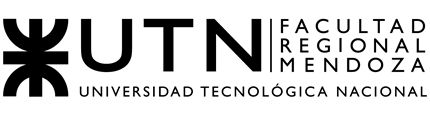
</div>
</center>
<center>
    <div style="font-family: 'Georgia', serif; font-size: 24px;">
        <p><strong>Ingeniería en Electrónica. Análisis de Señales y Sistemas</strong></p>
        </p>
                <!--<p><em>Profesor Mg. Ing. Javier Velez</em></p>-->
    </div>
</center>

# Trabajo práctico 3. Convolución con Python

La convolución es una operación clave en el análisis de sistemas lineales e invariantes en el tiempo (LTI), que nos permite calcular la salida de un sistema cuando conocemos su respuesta al impulso y la señal de entrada.

En este notebook, exploraremos la convolución en el contexto de un sistema acústico. Un sistema acústico se refiere a un conjunto de elementos físicos y materiales que influyen en cómo el sonido se propaga y se comporta dentro de un entorno. En términos simples, es el ambiente o espacio donde el sonido viaja, interactúa con superficies, se refleja, se absorbe, se dispersa y, finalmente, llega a nuestros oídos.

Principales características de un sistema acústico:

- Medio de propagación: El sonido siempre necesita un medio para propagarse. Normalmente, este medio es el aire, pero también puede ser agua o sólidos, como las paredes de un edificio.

- Reflexión: Cuando una onda sonora choca contra una superficie, parte de la onda se refleja, generando efectos como ecos o reverberaciones. La cantidad y calidad de estas reflexiones dependen del tamaño, la forma y los materiales del entorno acústico.

- Absorción: Algunas superficies absorben parte de la energía sonora, transformándola en calor. Materiales como alfombras, cortinas y paneles acústicos suelen absorber frecuencias medias y altas, lo que reduce el eco y la reverberación en un espacio.

- Difracción y difusión: El sonido también puede difractarse (curvarse alrededor de objetos) o dispersarse en múltiples direcciones, dependiendo de las características físicas del entorno.

Imaginemos una sala de conciertos. El sonido que percibimos en este espacio depende de las dimensiones, las superficies (paredes, techo, suelo) y los materiales utilizados. Si las paredes son muy reflectantes y el espacio es amplio, habrá una mayor reverberación, lo que hará que el sonido se perciba como más "lleno". En contraste, si las paredes están cubiertas con materiales absorbentes, el sonido será más seco y claro debido a la reducción de las reflexiones.

En el contexto de la convolución, trabajamos con la respuesta al impulso de un sistema acústico. Esto se refiere a cómo reacciona un espacio (el sistema acústico) ante un sonido breve y fuerte, como el disparo de un arma o la explosión de un globo. La respuesta al impulso nos proporciona información sobre las características acústicas del lugar. Como los sistemas acústicos son generalmente aproximables como LTI (aunque no del todo, esta suposición es válida para la mayoría de las aplicaciones), podemos utilizar esta respuesta para predecir cómo el sistema respondería a otra señal, como una grabación de violín, simulando así cómo sonaría en ese ambiente.

Comenzaremos ejecutaremos la siguiente celda que importa las libríeras numpy y matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Al ejecutar la siguiente celda, utilizaremos el comando de linux `gdown` para descargar una carpeta llamada "audios" desde Google Drive, donde los archivos fueron cargados previamente. Esta carpeta contiene dos archivos de audio en formato `.wav`: uno llamado `violín.wav` y otro llamado `disparo.wav`. El signo de exclamación previo a `gdown` es para ejecutar comandos de linux desde la celda.

La carpeta "audios" se descargará en la máquina virtual de Google donde se está ejecutando este notebook. Para visualizar o explorar los archivos descargados, puedes hacer clic en el icono de la carpeta ubicado cerca del centro de la barra lateral izquierda. Encontraremos los audios en la carpeta `/content/audios`. En sistemas Linux (como el que usa esta máquina virtual), el directorio / es conocido como el directorio raíz o root, y contiene todos los archivos y directorios del sistema.


In [ ]:
#Descarga librerias y archivos externos necesarios del drive en asys_tp6/resources a content/resources
!gdown --folder https://drive.google.com/drive/folders/1EeJRHYMAYyxlgaCqXjr0SCXVWXbRT66s?usp=sharing

Podemos verificar que los audios están en el directorio "audios" ejecutando el comando de linux `ls` que devuelve una lista de archivos que contiene un directorio. Para ejecutar comandos de linux recordemos que simplemente debemos antecederlo con un signo de exclamación para que la celda lo ejecute.

In [ ]:
!ls /content/audios

impulsiva.wav  violin.wav



El archivo `impulsiva.wav` es la grabación de un disparo de arma de fuego realizado dentro de un espacio cerrado de gran tamaño, como un galpón. Esta señal no solo capta el sonido directo del disparo, sino también todas las reflexiones en las paredes y el techo, registrando cómo se comportan estos fenómenos en el lugar donde se ubicó el micrófono.

Dado que el disparo es un sonido de alta energía y corta duración, tiene una gran similitud con un impulso unitario, por lo que podemos considerarlo una buena aproximación. Por ello, la grabación de ese disparo en una posición determinada del galpón es una buena aproximación de la respuesta impulsiva $h(t)$ del sistema acústico.

En el siguiente código, utilizaremos la función `read`, que se encuentra en la librería `scipy.io.wavfile`, para cargar archivos `.wav` en memoria.

In [ ]:
from scipy.io.wavfile import read

framerate, h = read('/content/audios/impulsiva.wav')  # Cambia la ruta a la correcta



<ipython-input-36-1e8dd5ee7889>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  framerate, h = read('/content/audios/impulsiva.wav')  # Cambia la ruta a la correcta


La función `read` devuelve dos variables. La primera es la tasa o frecuencia de muestreo (en Hertz), conocida en inglés como `framerate`. Este valor nos indica cuántas muestras por segundo se tomaron al digitalizar la señal captada por el micrófono.

El mensaje que aparece al ejecutar la celda se debe a que el archivo `.wav` contiene información adicional que la función read está ignorando. Esta información extra no es relevante para nuestra tarea, por lo que podemos omitirla sin problemas.


In [ ]:
print(framerate)

44100


Es interesante notar que se tomaron $44.100$ muestras por segundo. Sabemos que la frecuencia máxima audible por el ser humano es de $20$ $kHz$. Si elegimos una frecuencia de muestreo que sea $2,205$ veces la frecuencia máxima, obtenemos una frecuencia de muestreo de $44.100$ $Hz$. De este modo, podemos ver que la discretización de la señal cumple con el teorema del muestreo.

La segunda variable que devuelve la función `read` contiene las muestras de la señal capturada. En nuestro caso, hemos llamado `h` a esta señal, ya que representará nuestra respuesta impulsiva. La señal puede estar codificada de dos maneras:

1. Como un vector columna si fue grabada con un micrófono mono (un micrófono con un único sensor).

2. Como una matriz con dos columnas si la señal fue capturada con un micrófono estéreo (que tiene dos sensores). Cada columna corresponderá a lo que registró cada uno de los sensores del micrófono, comúnmente denominados "canal derecho" y "canal izquierdo".

Verificaremos con qué tipo de micrófono se grabó nuestra respuesta al impulso unitario.

In [ ]:
# Verificar las dimensiones del arreglo 'h'
print("forma de los datos de audio:", h.shape)

forma de los datos de audio: (94398, 2)


Observamos que $h$ tiene $94.398$ filas (la cantidad de muestras) y 2 columnas, lo que indica que la grabación fue realizada con un micrófono estéreo. Si se tomaron $94.398$ muestras a una tasa de $44.100$ muestras por segundo, la duración de la señal es de $\frac{94398}{44100} = 2.14 $ segundos.

Para el trabajo que realizaremos en esta ocasión, no es necesario utilizar ambos canales. El sonido captado por uno de los sensores del micrófono será suficiente para aproximar la respuesta impulsiva del sistema. Por lo tanto, procederemos a quedarnos con solo un canal.

In [ ]:
h = h[:, 0]
print(h.shape)

(94398,)


con la línea `h = h[:, 0]`  indicamos que queremos todas las filas (usando el signo `:`) de la columna $0$. Si no tienes claro cómo funciona, repasa el apartado de `slicing` del tutorial de `numpy`.


A continuación, importaremos un objeto$^1$ llamado `Audio` que nos permite reproducir audios directamente en un notebook de Jupyter. Solo necesitamos proporcionarle la señal que queremos reproducir y la frecuencia de muestreo con la que fue discretizada.

In [ ]:
from IPython.display import Audio
Audio(h, rate=framerate)

$^1$: Un objeto en Python es una entidad que representa datos y las funciones que pueden operar sobre esos datos. Todo en Python es un objeto, desde números hasta funciones y estructuras de datos. Cada objeto tiene un tipo (por ejemplo, entero, cadena, lista) que determina qué operaciones se pueden realizar sobre él. Los objetos se crean a partir de clases, que son como plantillas para crear objetos con características específicas. La programación orientada a objetos es un tópico avanzado en python que omitiremos en este curso de Señales y Sistemas.

Ahora vamos a graficar la señal utilizando `matplotlib`. Primero, necesitamos crear el vector que representará el tiempo. Para ello, generamos un vector de la misma longitud que `h`, y dividimos cada valor por la frecuencia de muestreo para obtener un vector que indique a qué instante de tiempo corresponde cada muestra.


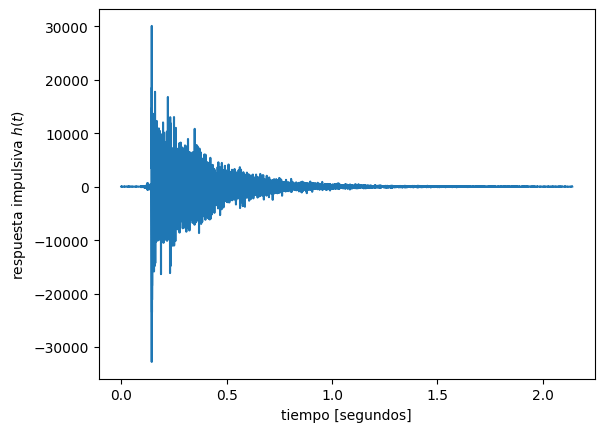

In [ ]:
ts = np.arange(len(h)) / framerate
plt.plot(ts,h)
plt.xlabel('tiempo [segundos]')
_ = plt.ylabel('respuesta impulsiva $h(t)$')

hagamos zoom a la señal visualizando solamente las primeras 300 muestras:

Text(0, 0.5, 'respuesta impulsiva $h(t)$')

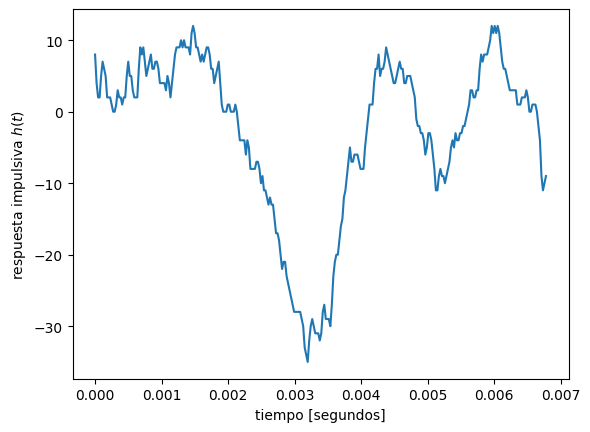

In [ ]:
plt.plot(ts[:300],h[:300])
plt.xlabel('tiempo [segundos]')
plt.ylabel('respuesta impulsiva $h(t)$')

A continuación, vamos a normalizar la señal. La normalización es un paso importante cuando trabajamos con la convolución de señales, ya que las señales originales pueden tener diferentes escalas de amplitud, lo que podría afectar el resultado final si no se ajustan correctamente. Además, la normalización garantiza que el resultado de la convolución se mantenga dentro del rango dinámico esperado, evitando posibles saturaciones digitales por overflow. Para normalizar, simplemente ajustamos los valores de la señal para que se encuentren dentro del rango $[-1,1]$.

In [ ]:
h = h / np.max(np.abs(h))

Bien, ya hemos cargado y reproducido la señal que utilizaremos como respuesta impulsiva. Ahora necesitamos realizar el mismo proceso con la señal que emplearemos como entrada.

Nuestra señal de entrada es una grabación de un violín dentro de un estudio de grabación. El archivo de audio se llama `violin.wav`.

Es tarea del estudiante completar las siguientes celdas para cargar esta señal en una variable llamada `x`, ya que será la entrada de nuestro sistema.

Recuerda que el archivo de la señal de entrada se encuentra en `/content/audios`

In [ ]:
#completar

Verificar la frecuencia de muestreo

In [ ]:
#completar

Verificar si la señal es mono o estéreo.

In [ ]:
#completar

Quedarnos solo con el canal $0$ si es necesario

In [ ]:
#completar

Reproducir la señal con el objeto  `Audio`

In [ ]:
#completar

Graficar con matplotlib

In [ ]:
#completar

Hacer zoom de la señal entre las muestra 44000 y 44300

In [ ]:
#completar

Normalizar

NOTA IMPORTANTE: siempre que estemos trabajando con `numpy`estaremos trabajando con señales muestreadas almacenadas en vectores.  Estamos trabajando en el dominio de tiempo discreto, pero debido a que sabemos que las señales han sido muestreadas con una frecuencia de muestreo apropiada, por comodidad trabajaremos simulando estar en tiempo continuo.


Ahora que ya tenemos cargadas las dos señales $h(t)$ y $x(t)$, es momento de realizar la convolución entre ellas para obtener la salida del sistema $y(t)$. Esto nos dará una aproximación de cómo sonaría el violín dentro del galpón,  teniendo en cuenta que la respuesta impulsiva es aproximada.  

Existen varios métodos para realizar la convolución, pero aquí analizaremos dos. El primero consiste en escribir una función que calcule la convolución entre las señales basándose en su definición:

$$y[n]=\sum_{k=-∞}^{∞} x[k]h[n-k]$$

Podemos implementar esta ecuación usando dos bucles `for` anidados, uno para recorrer `n` y otro para recorrer `k`. Si bien esta solución es funcional, no es recomendable, ya que no aprovecharíamos el hardware dedicado que posee nuestro procesador para realizar este tipo de cálculos.

La manera más eficiente en python es usando las librerías que fueron programadas en bajo nivel como `numpy` o `scipy`  que están programadas en bajo nivel y aprovechan el hardware específico para realizar estos cálculos de manera eficiente. En nuestro caso, utilizaremos `scipy`.

A continuación, proporcionamos un código que implementa la convolución de manera manual a modo de ejemplo. Si lo ejecutas, notarás que el tiempo de cálculo es excesivo, llegando a superar la media hora.


In [ ]:
def convolve_signals(x, h):
    """
    Realiza la convolución entre dos señales x y h usando bucles for.

    Parameters:
    x: array_like
        Primer vector de señal.
    h: array_like
        Segundo vector de señal.

    Returns:
    y: ndarray
        El resultado de la convolución entre x y h.
    """
    # Tamaños de las señales
    len_x = len(x)
    len_h = len(h)

    # El tamaño de la señal convolucionada es len_x + len_h - 1
    len_y = len_x + len_h - 1

    # Inicializamos el resultado de la convolución con ceros
    y = np.zeros(len_y)

    # Realizamos la convolución usando bucles for
    for n in range(len_y):
        # Calculamos cada elemento de y[n]
        for k in range(len_x):
            if n - k >= 0 and n - k < len_h:
                y[n] += x[k] * h[n - k]

    return y

r = convolve_signals(x, h)

Veremos ahora como calcular la convolución de manera eficiente utilizando el módulo `signal`de `scipy`.

Primero importaremos el módulo `signal` que se encuentra dentro de la librería `scipy`. Este módulo nos permitirá realizar la convolución ejecutando `signal.convolve`.

In [ ]:
from scipy import signal

y =  signal.convolve(x, h, mode='full') #el modo full asegura que se calcule la convolución completa

Ahora deberán completar el código para reproducir el resultado de la convolución utilizando el objeto `Audio`

In [ ]:
#completar

Escuche atentamente y compare el resultado de la convolución con la grabación original del violín.

Ahora deberán graficar la señal resultante de la convolución. Recuerde que la convolución en general tiene como resultado una cantidad igual a $n_c = n_1 +n_2 -1$ donde $n_c$ es la cantidad de muestras del resultado de la convolución y $n_1$ y $n_2$ son la cantidad de muestras que tienen las respectivas señales que se están convolucionando. Esto implica que deben generar un vector de tiempo nuevo para graficar la señal.

In [ ]:
#completar

## <u>Ejercicio: </u>

Escriba un programa que permita calcular y gráficar la convolución solicitada en el  ejercicio 10.a de del trabajo práctico nº 6 de gabinete y comparar con el cuadro 1 de la página 11. En este caso graficar utilizando `plt.stem` ya que estamos tratando con señales intrínsecamente discretas y que no provienen de una señal continua muestreada. No olvides colocar las etiquetas correspondientes a cada eje.

In [ ]:
###COMPLETAR

## Convolución discreta en 2 dimensiones: Procesamiento de imágenes
Aunque hemos presentado la convolución en una dimensión, el concepto se puede extender a múltiples dimensiones.

La aplicación más común de la convolución discreta en dos dimensiones se encuentra en el procesamiento de imágenes digitales.

Una imagen digital en escala de grises (sin información de color) se representa como una matriz de $n \times m$ píxeles, donde cada posición de la matriz contiene un valor que indica el nivel de brillo o intensidad de gris de cada píxel.

Al trabajar con imágenes en escala de grises, es común utilizar 8 bits para representar el nivel de brillo de cada píxel, lo que permite una escala de 256 posibles valores, desde 0 (negro) hasta 255 (blanco).

![imagen](https://i1.wp.com/datasmarts.net/es/wp-content/uploads/2021/11/Matrix-for-certain-area-of-a-grayscale-image-17.jpg?w=356&ssl=1)



### Ejemplo:

Vamos a importar el módulo `data` de la biblioteca `skimage`, que nos provee imágenes de muestra para trabajar.

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]
shape:  (512, 512)


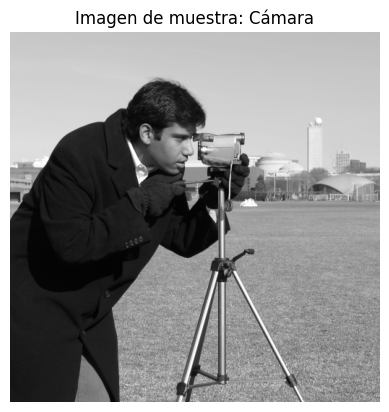

In [2]:
from skimage import data
image = data.camera()
print(image)
print("shape: " ,image.shape)
plt.imshow(image, cmap='gray')
plt.title("Imagen de muestra: Cámara")
plt.axis('off')
_=_

# Explicación del código

1. `image = data.camera()`
En esta línea, utilizamos la función `camera()` de la biblioteca `skimage.data` para cargar una imagen de ejemplo. La imagen es en escala de grises y representa una cámara clásica. Esta función devuelve una matriz 2D en la que cada valor representa la intensidad de un píxel (su nivel de brillo) en la imagen.

1. `print(image)`
Esta línea imprime parte de la matriz que representa la imagen en la consola. Cada número corresponde al valor de brillo de un píxel en la imagen (entre 0 y 256), donde los valores bajos representan áreas oscuras y los valores altos áreas claras.

1. `print(image.shape)
Esta línea nos permite ver la forma de la matriz, en este caso vemos que la imagen tiene dimensiones de 512 x 512 píxeles.

1. `plt.imshow(image, cmap='gray')`
Aquí, utilizamos la función `imshow()` de `matplotlib.pyplot` para mostrar la imagen en pantalla. Dado que la imagen está en escala de grises, especificamos el parámetro `cmap='gray'` para que se visualice correctamente como una imagen en blanco y negro. Si no usáramos el `cmap`, podría interpretarse como una imagen en color, lo cual no es correcto.

1. `plt.title("Imagen de muestra: Cámara")`
Agregamos un título a la imagen utilizando la función `title()` para que sea más fácil identificar lo que estamos mostrando.

1. `plt.axis('off')`
Esta línea desactiva los ejes de la imagen. De esta manera, no se muestran los valores de coordenadas alrededor de la imagen, lo que ayuda a que la visualización sea más limpia y clara.



La convolución en dos dimensiones se define como:

$$
h[m,n]* I [m, n] = \sum_{i=-\infty}^{\infty} \sum_{j=-\infty}^{\infty} h(i, j) \cdot I(m-i, n-j)
$$

En este caso, las variables discretas $m$ y $n$ no representan el tiempo, sino las coordenadas de un píxel en una imagen digital.

- $I[m,n]$ representa los píxeles de la imagen que queremos procesar.

- $h[m,n]$ es el kernel o núcleo de la convolución, el equivalente a la respuesta al impulso en 2 dimensiones.



La $h[m,n]$ se elige para modificar alguna característica de la imagen, como eliminar ruido o suavizar una imagen.

###Uso de la convolución en imágenes:

El kernel $h[m,n]$ se elige para modificar ciertas características de la imagen, como suavizarla o eliminar el ruido.



## Proceso de convolución en 2D:

La **convolución en 2D** es una operación que se realiza entre una imagen y un kernel (o filtro) para obtener una nueva imagen. Esta técnica es muy utilizada en el procesamiento de imágenes para tareas como suavizado, realce de bordes y eliminación de ruido.

El kernel es una pequeña matriz (generalmente de 3x3 o 5x5) que se desliza sobre cada píxel de la imagen original. En cada paso, se multiplica el valor de los píxeles cubiertos por el kernel por los valores correspondientes en el kernel, y luego se suman estos productos para obtener el valor del nuevo píxel en la imagen resultante.

#### Cómo se aplica el kernel:

1. El kernel se posiciona sobre la imagen original, centrado en un píxel determinado.
2. Cada valor en el kernel se multiplica por el valor correspondiente de la imagen que está cubriendo.
3. Luego, se suman todos los productos.
4. Este valor sumado se asigna al píxel correspondiente en la nueva imagen.
5. El proceso se repite mientras el kernel se desliza por toda la imagen.


Consideremos un kernel pasabajos de 3x3, que es un filtro promedio simple. El siguiente kernel suaviza la imagen al reducir las variaciones bruscas de intensidad:

$$
\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}
$$

Este kernel toma el promedio de los píxeles en la vecindad de 3x3 para suavizar la imagen, reduciendo las altas frecuencias, que corresponden a cambios abruptos de brillo. El resultado es una imagen más suave, con menos detalle.

### Proceso:

1. Cuando el kernel cubre una zona de la imagen donde los valores de los píxeles son similares (como una región de color uniforme), el resultado de la convolución será muy cercano al valor promedio de esos píxeles.
2. En las zonas donde los píxeles cambian abruptamente (bordes o detalles finos), el kernel suaviza el contraste, lo que reduce la nitidez de los bordes.
3. Al final, la imagen convolucionada se verá más borrosa, ya que el filtro pasabajos atenúa las transiciones bruscas de brillo y deja pasar las zonas suaves.


A continuación, aplicaremos un filtro pasa bajos a la imagen, que reducirá las altas frecuencias. En términos visuales, esto significa atenuar los cambios bruscos de brillo, suavizando los detalles de la imagen.

Para realizar la convolución discreta en dos dimensiones utilizaremos la función  `convolve2d(image, kernel, mode='same', boundary='wrap')` del módulo `signal`de la librería `scipy`

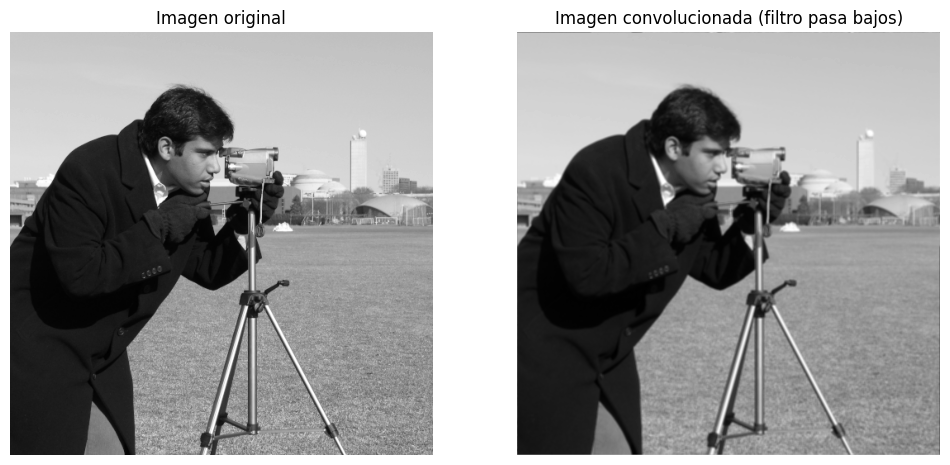

In [3]:
from scipy.signal import convolve2d
# Definir un kernel de filtro pasa bajos de 3x3 (promedio de la vecindad)
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

convoluted_image = convolve2d(image, kernel, mode='same', boundary='wrap')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convoluted_image, cmap='gray')
plt.title("Imagen convolucionada (filtro pasa bajos)")
plt.axis('off')

plt.show()


### Ejercicio

Cargue la imagen `coins` de la librería `skimage` (`data.coins()`) y aplique ala imagen un filtro pasa-altos dado por el siguiente kernel.

$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

Un filtro pasaaltos en procesamiento de imágenes se utiliza para resaltar los bordes y detalles finos en la imagen, atenuando las bajas frecuencias (zonas suaves o uniformes). Un ejemplo común de kernel para un filtro pasaaltos en 2D es aquel que detecta los cambios abruptos en la intensidad de los píxeles, destacando así los bordes.

In [ ]:
#completar

Ahora aplique el filtro pasa altos a la imagen `camera`.

In [6]:
#completar